In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
import requests
import urllib.request
import json
import pprint
from dotenv import load_dotenv

%matplotlib inline

In [56]:
load_dotenv()
access_token = os.getenv("CQ_API_KEY")
headers = { 'Authorization': 'Bearer ' + access_token }
import urllib.request
url_a = "https://api.cryptoquant.com/v1/btc/exchange-flows/reserve?exchange=binance&window=day&from=20150101&to=20210101"
response_a = requests.get(url_a, headers=headers)
all_exchange_reserve=response_a.json()
print(type(all_exchange_reserve))
#pprint.pprint(all_exchange_reserve)

all_exchange_df = pd.DataFrame(data=all_exchange_reserve['result']['data'])
all_exchange_df['date'] = pd.to_datetime(all_exchange_df['date'])
all_exchange_df = all_exchange_df.set_index('date')
all_exchange_df.head()


<class 'dict'>


,reserve,reserve_usd
date,,
2021-01-01,288178.322394,8.459608e+09
2020-12-31,285775.985433,8.269640e+09
2020-12-30,286856.740110,8.285127e+09
2020-12-29,285467.390927,7.816968e+09
2020-12-28,287093.528710,7.769291e+09


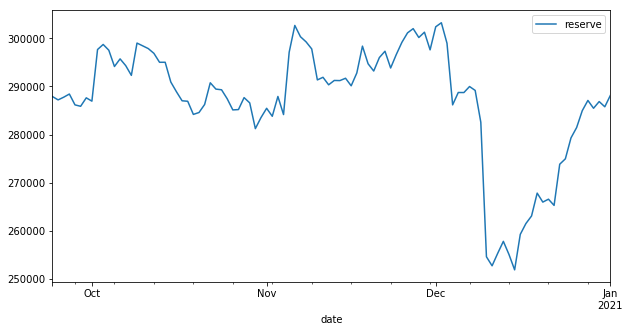

In [45]:
exchange_reserve_df=all_exchange_df.drop(columns=["reserve_usd"])
exchange_reserve_df.plot(figsize=(10,5))

In [46]:
#Add bitcoin price to visualize

In [55]:
btc_URL = "https://api.cryptoquant.com/v1/btc/market-data/price-usd?window=day&from=20150101&to=20210101"
response = requests.get(btc_URL, headers=headers)

btc_price_data = response.json()
print(type(btc_price_data))

#pprint.pprint(btc_price_data)
btc_price_df = pd.DataFrame(data=btc_price_data['result']['data'])
btc_price_df = btc_price_df.drop(['price_usd_high','price_usd_low','price_usd_open'], axis = 1)
btc_price_df['date'] = pd.to_datetime(btc_price_df['date'])
btc_price_df = btc_price_df.set_index('date')

btc_price_df.head(15)


<class 'dict'>


,price_usd_close
date,
2021-01-01,29355.463333
2020-12-31,28937.490000
2020-12-30,28882.456000
2020-12-29,27383.052000
2020-12-28,27061.882000
2020-12-27,26269.252000
2020-12-26,26481.480000
2020-12-25,24709.222000
2020-12-24,23738.966000


In [48]:
#combine btc price and btc reserve on exchanges

In [49]:

price_to_exchange_reserve_df = pd.concat([btc_price_df,exchange_reserve_df['reserve']],ignore_index=False, axis=1, sort=False)
price_to_exchange_reserve_df = price_to_exchange_reserve_df.drop_duplicates()


price_to_exchange_reserve_df.head(10)

,price_usd_close,reserve
date,,
2021-01-01,29355.463333,288178.322394
2020-12-31,28937.490000,285775.985433
2020-12-30,28882.456000,286856.740110
2020-12-29,27383.052000,285467.390927
2020-12-28,27061.882000,287093.528710
2020-12-27,26269.252000,284965.513173
2020-12-26,26481.480000,281464.621630
2020-12-25,24709.222000,279317.866506
2020-12-24,23738.966000,274971.178045


                 price_usd_close   reserve
price_usd_close         1.000000 -0.359168
reserve                -0.359168  1.000000


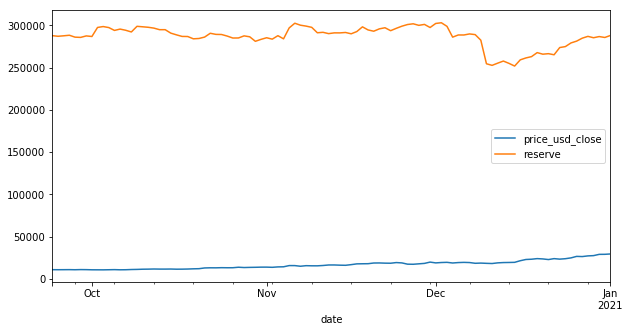

In [50]:
price_to_exchange_reserve_df.plot(figsize=(10,5))
#correlation
correlation=price_to_exchange_reserve_df.corr()
print(correlation)
#result is they are not heavily correlated

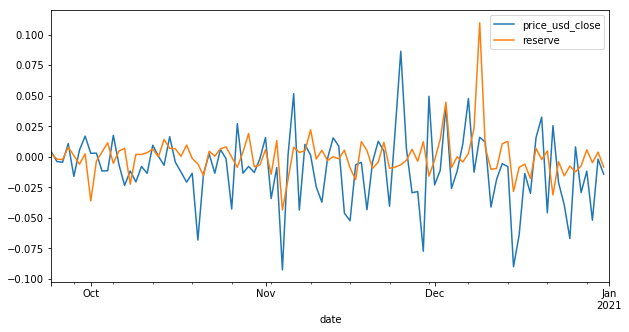

In [51]:
#change to percentages to see if that makes any difference
price_to_exchange_reserve_df=price_to_exchange_reserve_df.pct_change()
price_to_exchange_reserve_df.plot(figsize=(10,5))


In [52]:
#correlation
correlation=price_to_exchange_reserve_df.corr()
print(correlation)
#result is they are not heavily correlated

                 price_usd_close  reserve
price_usd_close          1.00000  0.23348
reserve                  0.23348  1.00000


In [ ]:
#result is they are not heavily correlated